# Pràctica 2

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv', header=0, delimiter=',')
test_df =  pd.read_csv('test.csv', header=0, delimiter=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mirem les dades tipus i nombre de nuls, veiem que les columnes Age, Cabin i Embarked contenen nul·ls ja que el valor total de les entrades es de 891 i aquestes contenen menys valors



In [3]:
print("Dades Train")
print(train_df.info())

print("\nDades Test")
print(test_df.info())

Dades Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dades Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

Train Data:

- Age: 177/891 missed values (19.8% missed).
- Cabin: 687/891 missed values (77.1% missed).
- Embarked: 2/891 missed values.
Test Data:

- Age: 86/418 missed values (20.5% missed).
- Cabin: 327/418 missed values (78.2% missed).
- Fare: 1/418 missed values.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D'aqui podrem observar que:

- La taxa de supervivencia es del 38.3%
- Més del 75% dels passargers estan per sobre dels 38 anys
- Hi ha molta gent gran
- Molts passatgers viatjen sols
- Tenim outliers a la caracteristica Fare

### Fem fora les variables no necesaries

In [5]:
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Transorfmem les variables catecogiques Sex i Embarked

In [6]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)
train_df.drop(['Sex','Embarked'],axis=1,inplace=True)
train_df = pd.concat([train_df,sex,embark],axis=1)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,1,1,38.0,1,0,71.2833,C85,0,0,0
2,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,35.0,1,0,53.1000,C123,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,1,0,1


### Tractament de nuls
Hem de realitzar un tractament de nul·ls per tenir les columnes amb totes les variables necessaries, per aixo omplirem la columna d'edat segons la classe on estan situats

In [7]:
f_class_Age=train_df.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

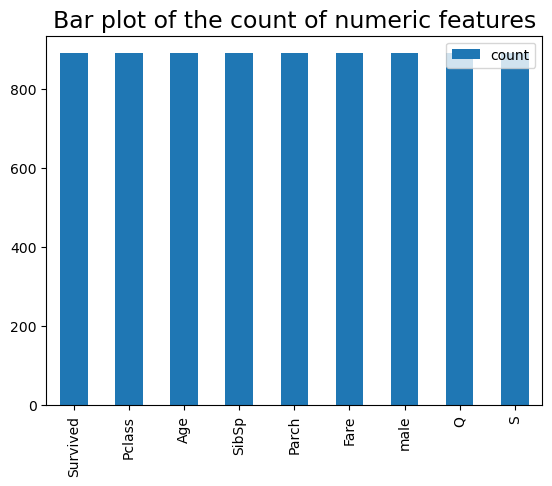

In [8]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
d=train_df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

Neccessitem tambe omplir els valors de les columnes Cabina, PassengerId, Name i Ticket, ho farem amb la comanda dropna i implace=True, d'aquesta manera.

### Drop the 'Cabin' feature and any other null value

In [9]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
